In [295]:
from pydent import AqSession, models, ModelBase
import pprint
import time
import json
import pprint
from datetime import datetime
from datetime import timedelta

In [408]:
#Import data analysis tools...

# Plot things in the notebook, instead of on a separate window.
%matplotlib inline

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options
plt.style.use('seaborn-white')

In [20]:
s = AqSession("Nick", "25Me4qvvvv", "http://54.190.2.203")
s.set_timeout(60)

In [241]:
# #Collect data on ops from plans submitted by users with these usernames
COLLECT_USERS = ["Nick (Real User)", "Jingxuan Wu", "Marilene Pavan Rodrigues"]

# #Collect data on operation types with these names
COLLECT_OPERATION_TYPES = ["Extract Fragment", "Order Primer", "Check Plate", "Make Overnight Inoculum", 
                           "Make Glycerol Stock", "PCR", "Run On Agarose Gel", "Ligation", "Restriction Digest", 
                           "Modular Cloning", "Gibson Assembly", "Rehydrate Primer", "Purify Gel Slice", 
                           "Make Miniprep", "E.coli Transformation", "Purify DNA from Reaction", 
                           "Send to Sequencing", "Upload Sequencing Results", "Confirm Sequencing Results", 
                           "Mutagenesis", "Mutagenesis by Inverse PCR"]

# #Specifies data associations to collect for output items.
# #Example:
# # COLLECT_OUTPUT_ITEM_DATA = {
#     #"Operation name": {
#         #"An output name": ["data association name", "another data association name"]
#         #},
#     #"Another operation name": {
#         # "An output name": ["data association name", "another data association name"]
#     #}
# #}
# COLLECT_OUTPUT_ITEM_DATA = {
#     "Check Plate": {
#         "Plate": ["white_colonies", "blue_colonies", "red_colonies"]
#     },
#     "Purify Gel Slice": {
#         "Fragment": ["concentration", "volume", "A260280", "A260230"]
#     },
#     "Make Miniprep": {
#         "Plasmid": ["concentration", "volume", "A260280", "A260230"]
#     },
#     "Purify DNA from Reaction": {
#         "Purified DNA": ["concentration", "volume", "A260280", "A260230"]
#     },
#     "Upload Sequencing Results": {
#         "Plasmid": ["sequence_ok", "delete_requested"]
#     }
# }


collect_u_ids = [s.User.find_by_name(u).id for u in COLLECT_USERS]
collect_ot_ids = [s.OperationType.where({"name" : ot_name, "deployed" : True})[-1].id for ot_name in COLLECT_OPERATION_TYPES]

In [46]:
# collect_user_ids = [s.User.find_by_name(u).id for u in COLLECT_USERS]

# #fig, ax = plt.subplots(COLLECT_OPERATION_TYPES, 1)

# for i, ot_name in enumerate(COLLECT_OPERATION_TYPES):
#     op_data = {
#         "id" : [],
#         "time" : [],
#         "technician" : [],
#         "status" : []
#     }
    
#     for user_id in collect_user_ids:
#         print(ot_name)
        
#         ot = s.OperationType.where({"name": ot_name, "deployed": True})[0]

#         ops = [op for op in ot.operations if ((op.status == 'done' or op.status == 'error') and op.user_id == user_id)]
#         ops = ops[:20]

#     #     #List used to store data for all operations of this operation type.
#     #     op_data = []
#     #     for op in ops:
#     #         if s.User.find(op.plan.user_id).name in COLLECT_USERS:
#     #             op_data.append({
#     #                 "ID": op.id,
#     #                 "Status": op.status,
#     #                 "Submitted By": s.User.find(op.plan.user_id).name
#     #             })
#     #             if op.jobs:
#     #                 op_data[-1]["Run By"] = s.User.find(op.jobs[-1].user_id).name
#     #             else:
#     #                 op_data[-1]["Run By"] = ""
#     #             if COLLECT_OUTPUT_ITEM_DATA[ot_name]:
#     #                 for output_name, output_data in COLLECT_OUTPUT_ITEM_DATA[ot_name].items():
#     #                     output_item = op.output(output_name).item
#     #                     for data_name in output_data:
#     #                         if output_item and s.DataAssociation.where({"parent_id": output_item.id, "key": data_name}):
#     #                             val = s.DataAssociation.where({"parent_id": output_item.id, "key": data_name})[0].value
#     #                             op_data[-1]["Output ({0}), {1}".format(output_name, data_name)] = val
#     #                         else:
#     #                             op_data[-1]["Output ({0}), {1}".format(output_name, data_name)] = ""
#     #     print(op_data)

#         for op in ops:
#             op_data["id"].append(op.id)
#             if op.jobs:
#                 op_data["time"].append(op.jobs[-1].updated_at)
#                 op_data["technician"].append(op.jobs[-1].user_id)
#             else:
#                 op_data["time"].append(None)
#                 op_data["technician"].append(None)
#             op_data["status"].append(op.status)

#     #df = pd.DataFrame(op_data)
#     #print(df["time"])
#     #df["time"].plot_date(kind='hist', axs=ops_over_time_axs[i])
    
    

# Collect Operation Info

In [118]:
op_data = {
    "id" : [],
    "type" : [],
    "status" : [],
    "technician" : []
}

for ot_id in collect_ot_ids:
    ot = s.OperationType.find(ot_id)
    u = s.User.find(u_id)
    print(ot.name)
    ops = [op for op in ot.operations if op.user_id in collect_u_ids]

    for op in ops:
        op_data["id"].append(op.id)
        op_data["type"].append(ot_id)
        if op.jobs:
            op_data["status"].append(op.status)
            op_data["technician"].append(int(op.jobs[-1].user_id))
        else:
            op_data["status"].append(None)
            op_data["technician"].append(None)

Check Plate
Purify Gel Slice
Make Miniprep
Purify DNA from Reaction
Upload Sequencing Results


In [140]:
df = pd.DataFrame(op_data)

df = df.dropna(how='any')
print(df.dtypes)
df["technician"]=df["technician"].astype(int)
print(df.dtypes)
df.head()

id              int64
status         object
technician    float64
type            int64
dtype: object
id             int64
status        object
technician     int64
type           int64
dtype: object


,id,status,technician,type
0,52249,done,200,336
2,52869,done,200,336
3,52872,done,200,336
4,52875,done,200,336
5,52878,done,200,336


In [150]:
df_with_names = df

tech_names = {}
for id in list(df["technician"].unique()):
    if id:
        tech_names[id] = s.User.find(int(id)).name
    else:
        tech_names[id] = None

type_names = {}
df["type"].unique()
for id in list(df["type"].unique()):
    if id:
        type_names[id] = s.OperationType.find(int(id)).name
    else:
        type_names[id] = None
        
print(tech_names, type_names)

find_tech_name = lambda x: tech_names[int(x)]
find_type_name = lambda x: type_names[int(x)]
df_with_names["technician"] = df_with_names['technician'].map(find_tech_name)
df_with_names['type'] = df_with_names['type'].map(find_type_name)

df_with_names

{200: 'Nicholas Emery', 206: 'Ethan', 187: 'Marilene Pavan Rodrigues', 191: 'Jingxuan Wu'} {336: 'Check Plate', 482: 'Purify Gel Slice', 483: 'Make Miniprep', 488: 'Purify DNA from Reaction', 493: 'Upload Sequencing Results'}


,id,status,technician,type
0,52249,done,Nicholas Emery,Check Plate
2,52869,done,Nicholas Emery,Check Plate
3,52872,done,Nicholas Emery,Check Plate
4,52875,done,Nicholas Emery,Check Plate
5,52878,done,Nicholas Emery,Check Plate
6,52881,done,Nicholas Emery,Check Plate
7,52884,done,Nicholas Emery,Check Plate
8,52887,done,Nicholas Emery,Check Plate
9,52890,done,Nicholas Emery,Check Plate
10,52893,done,Nicholas Emery,Check Plate


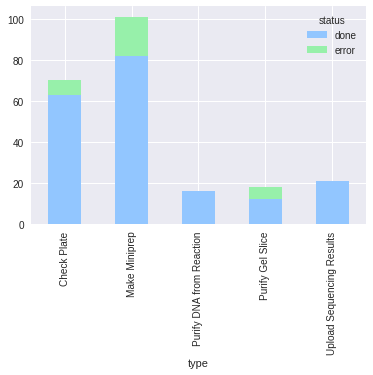

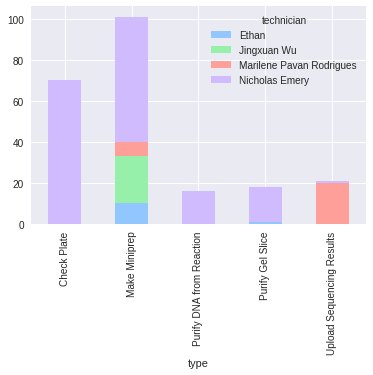

In [399]:
df2 = df_with_names.groupby(['type', 'status'])['type'].count().unstack('status').fillna(0)
df2[['done', 'error']].plot(kind='bar', stacked=True)

df3 = df_with_names.groupby(['type', 'technician'])['type'].count().unstack('technician').fillna(0)
df3.plot(kind='bar', stacked=True)

# # create 3 data sets with 1,000 samples
# mu, sigma = 200, 25
# x = mu + sigma*np.random.randn(1000,3)

# #Stack the data
# plt.figure()
# n, bins, patches = plt.hist(x, 30, stacked=True, normed = True)
# plt.show()

# ##Continued from above
# ###Now as three separate arrays
# x1 = mu + sigma*np.random.randn(990,1)
# x2 = mu + sigma*np.random.randn(980,1)
# x3 = mu + sigma*np.random.randn(1000,1)

# #Stack the data
# plt.figure()
# plt.hist([x1,x2,x3], bins, stacked=True, normed = True)
# plt.show()

In [227]:
job_example = s.Job.find(51772)
prettyprint = lambda x: json.dumps(x, indent=4, sort_keys=True)

In [189]:
#print(prettyprint(job_example.dump(only=('job_associations', 'operations'))))

In [229]:
as_json = json.loads(job_example.state)
as_json
print(as_json[0])
print(as_json[-2])

start_time = datetime.strptime(as_json[0]['time'], '%Y-%m-%dT%H:%M:%S+00:00')
end_time = datetime.strptime(as_json[-2]['time'], '%Y-%m-%dT%H:%M:%S+00:00')
total_time = end_time - start_time
print(total_time)

{'operation': 'initialize', 'arguments': {'operation_type_id': 466}, 'time': '2018-04-21T05:32:16+00:00'}
{'operation': 'next', 'time': '2018-04-21T06:57:13+00:00', 'inputs': {'table_inputs': [], 'timestamp': 1524293833.762}}
1:24:57


In [185]:
example_item = s.Item.find(128328)
prettyprint = lambda x: json.dumps(x, indent=4, sort_keys=True)
print(prettyprint(example_item.dump(only=('object_type'))))

{
    "object_type": {
        "rid": 987217
    },
    "rid": 987215
}


In [233]:
job_example.__dict__

{'_rid': 987273,
 '_session': <AqSession(name=None, AqHTTP=<AqHTTP(Nick, http://54.190.2.203)>))>,
 'arguments': {'operation_type_id': 466},
 'created_at': '2018-04-20T22:32:16-07:00',
 'desired_start_time': '2018-04-20T22:32:16-07:00',
 'group_id': 55,
 'id': 51772,
 'job_associations': [<JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>,
  <JobAssociation>],
 'latest_start_time': '2018-04-20T23:32:16-07:00',
 'loaded_fields': {'arguments': <fields.Raw(default=<marshmallow.missing>, attribute=None, validate=None, required=False, load_only=False, dump_only=False, missing=<marshmallow.missing>, allow_none=True, error_messages={'required': 'Missing data for required field.', 'type': 'Invalid input type.', 'null': 'Field may not be null.', 'validator_failed': 'Invalid value.'})>,
  'created_at': <fields.Ra

In [234]:
as_json[0]["arguments"]["operation_type_id"]

466

# Collect Job Info

In [422]:
print([s.OperationType.where({"name" : ot})[-1].id for ot in COLLECT_OPERATION_TYPES])
print(collect_ot_ids)
print([s.OperationType.find(id).name for id in collect_ot_ids])

[73, 328, 336, 337, 348, 466, 469, 474, 475, 477, 478, 481, 482, 483, 487, 488, 491, 493, 496, 497, 509]
[73, 328, 336, 337, 348, 466, 469, 474, 475, 477, 478, 481, 482, 483, 487, 488, 491, 493, 496, 497, 509]
['Extract Fragment', 'Order Primer', 'Check Plate', 'Make Overnight Inoculum', 'Make Glycerol Stock', 'PCR', 'Run On Agarose Gel', 'Ligation', 'Restriction Digest', 'Modular Cloning', 'Gibson Assembly', 'Rehydrate Primer', 'Purify Gel Slice', 'Make Miniprep', 'E.coli Transformation', 'Purify DNA from Reaction', 'Send to Sequencing', 'Upload Sequencing Results', 'Confirm Sequencing Results', 'Mutagenesis', 'Mutagenesis by Inverse PCR']


In [428]:
some_jobs = s.Job.all()

In [429]:
from pytz import timezone
utc_tz = timezone('UTC')

job_data = {
    "id" : [],
    "type" : [],
    "runtime" : []
}

for job in some_jobs:
    
    as_json = json.loads(job.state)
    
    if as_json[0]["arguments"]["operation_type_id"] in collect_ot_ids:

        try:
            start_time = as_json[0]['time']
            end_time = as_json[-2]['time']
        except:
            start_time = 0
            end_time = 0

        if type(start_time) is str:
            start_time_dt = datetime.strptime(start_time, '%Y-%m-%dT%H:%M:%S+00:00')
            start_time_dt = utc_tz.localize(start_time_dt)
        else:
            start_time_dt = datetime.fromtimestamp(int(start_time), utc_tz)

        if type(end_time) is str:
            end_time_dt = datetime.strptime(end_time, '%Y-%m-%dT%H:%M:%S+00:00')
            end_time_dt = utc_tz.localize(end_time_dt)
        else:
    #         print(start_time_dt)
    #         print(start_time_dt.tzinfo)
    #         print(end_time)
            end_time_dt = datetime.fromtimestamp(int(end_time), utc_tz)
    #         print(end_time_dt)
    #         print(end_time_dt.tzinfo)

    #     print(end_time_dt.tzinfo)
    #     print(type(end_time_dt))
    #     print(start_time_dt.tzinfo)
    #     print(type(start_time_dt))

        total_time = end_time_dt - start_time_dt

        job_data["id"].append(job.id)
        job_data["type"].append(as_json[0]["arguments"]["operation_type_id"])
    #     if total_time > timedelta(seconds=0):
    #         job_data["runtime"].append(total_time)
    #     else:
    #         job_data["runtime"].append(timedelta(seconds=0))
        job_data["runtime"].append(total_time)

job_df = pd.DataFrame(job_data)

print(job_df.dtypes)
job_df_filtered = job_df[(job_df.runtime >= timedelta(seconds=0.1)) & (job_df.runtime < timedelta(minutes=300))]
print(job_df_filtered)

id                   int64
runtime    timedelta64[ns]
type                 int64
dtype: object
        id  runtime  type
0    43288 00:01:48   328
1    43289 00:00:36   328
2    43290 00:00:35   328
4    43326 00:00:04   348
6    43332 00:04:42   348
8    43334 00:00:35   348
10   43336 00:01:07   336
12   43490 00:07:43   328
14   43552 00:02:59   348
16   43558 00:03:55   348
18   43564 00:01:06   348
20   43588 00:03:16   336
22   43624 00:00:57   336
24   43630 00:00:05   336
26   43668 00:00:08   336
28   43672 00:00:06   336
30   43674 00:00:38   336
32   43676 00:00:36   336
34   43932 00:02:04   336
36   43934 00:00:12   337
38   43936 00:00:02   348
40   44012 00:00:38   336
42   44014 00:00:30   336
44   44022 00:00:31   336
46   44024 00:00:45   336
48   44028 00:00:40   336
50   44032 00:00:18   336
52   44036 00:00:20   336
54   44038 00:03:36   336
58   44054 00:00:14   336
..     ...      ...   ...
724  51510 02:16:36   469
728  51528 00:23:48    73
730  51544 00:14:52  

In [430]:
job_df_with_names = job_df_filtered

ot_names = {}
for id in list(job_df_filtered["type"].unique()):
    if id:
        ot_names[id] = s.OperationType.find(int(id)).name
    else:
        ot_names[id] = None
        
print(ot_names)

find_ot_name = lambda x: ot_names[int(x)]

{328: 'Order Primer', 348: 'Make Glycerol Stock', 336: 'Check Plate', 337: 'Make Overnight Inoculum', 73: 'Extract Fragment', 469: 'Run On Agarose Gel', 474: 'Ligation', 478: 'Gibson Assembly', 475: 'Restriction Digest', 496: 'Confirm Sequencing Results', 481: 'Rehydrate Primer', 483: 'Make Miniprep', 487: 'E.coli Transformation', 482: 'Purify Gel Slice', 488: 'Purify DNA from Reaction', 466: 'PCR', 493: 'Upload Sequencing Results', 477: 'Modular Cloning', 491: 'Send to Sequencing'}


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

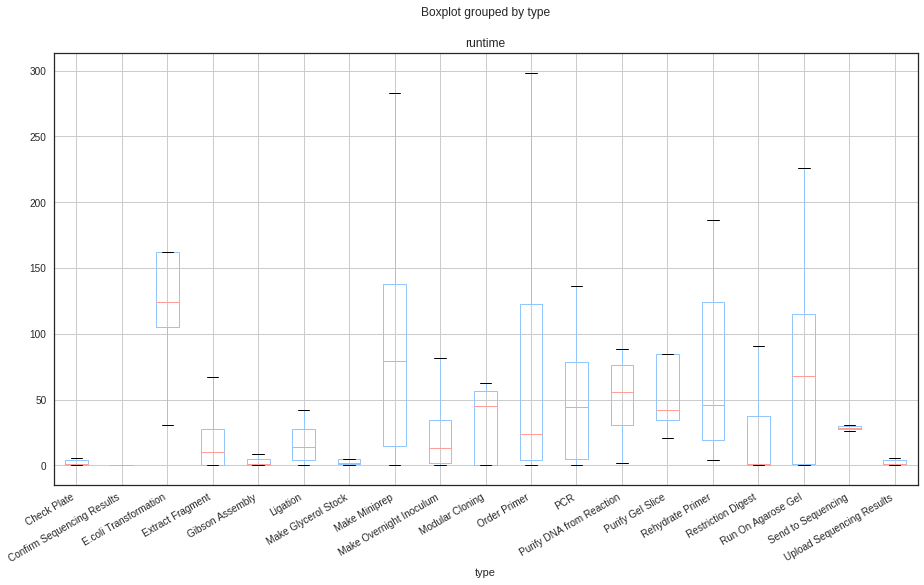

In [431]:
for_boxplot = job_df_filtered.drop(columns=['id'])

to_min = lambda x: x.total_seconds() / 60.0
for_boxplot["runtime"] = for_boxplot["runtime"].map(to_min)
for_boxplot["type"] = for_boxplot["type"].map(find_ot_name)

boxplot = for_boxplot.boxplot(column='runtime', by='type', figsize=(15,8))

plt.setp(boxplot.get_xticklabels(), rotation=30, horizontalalignment='right')

# multiple box plots on one figure
# plt.figure()
# plt.boxplot(for_boxplot)

# plt.show()

# for_boxplot = for_boxplot.groupby(['type'])

# for_boxplot.plot(kind='box')

#for_boxplot.set_index('type', inplace=True)

#print(for_boxplot)

#plt.plot(for_boxplot['type'], for_boxplot['runtime'])

# hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
# hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

# pivoted = for_boxplot.pivot_table(columns='type', values='runtime')
# pivoted.plot(kind='box', figsize=[16,8])